In [1]:
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import scipy.stats as sc

In [2]:
rand_data = np.random.normal(loc=0, scale=1, size=500)

In [3]:
st.mean(rand_data)

0.03910212025876215

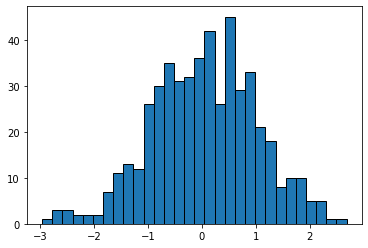

In [4]:
h = plt.hist(rand_data, bins=30, histtype='bar', ec='k') 

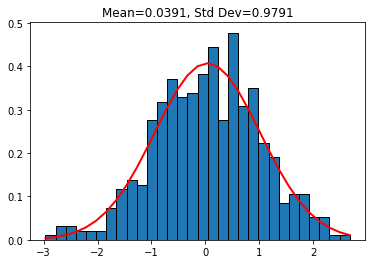

In [5]:
h = plt.hist(rand_data, bins=30, histtype='bar', density=1, ec='k') 
plt.plot(h[1], sc.norm.pdf(h[1], st.mean(rand_data), st.stdev(rand_data)), color='r', linewidth=2)
plt.title(r'Mean=%.4f, Std Dev=%.4f' %(st.mean(rand_data), st.stdev(rand_data)))
plt.show()

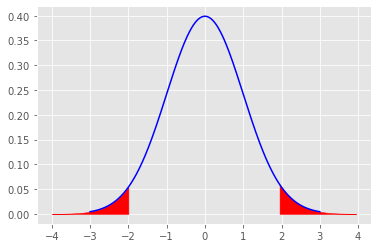

In [6]:
plt.style.use('ggplot')

# standard normal distribution
mean=0
std=1

x=np.linspace(mean-3*std, mean+3*std,1000)
iq=sc.norm(mean,std)
plt.plot(x,iq.pdf(x),'b')

# shows two tailed 95% significance interval (aka 2 std. deviations)
# alpha = 0.025 for each tail
pr=np.arange(1.95,4,0.1)
plt.fill_between(pr,iq.pdf(pr),color='r')

pl=np.arange(-4,-1.95,0.1)
plt.fill_between(pl,iq.pdf(pl),color='r')

# Note 1:  a one tailed test with an alpha=0.05 would have a std. deviation of 1.64
# Note 2:  the significance interval is the area between the two tails.

plt.show()

C:\Users\ejwda\Anaconda3\envs\PythonDataS2022\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\ejwda\Anaconda3\envs\PythonDataS2022\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\ejwda\Anaconda3\envs\PythonDataS2022\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


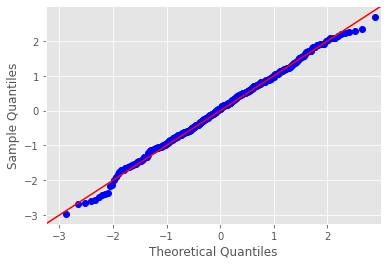

In [7]:
import statsmodels.api as sm

sm.qqplot(rand_data, line='45');
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show();

In [8]:
rand_data_2 = np.random.normal(loc=2, scale=1, size=500)

In [9]:
from scipy.stats import t

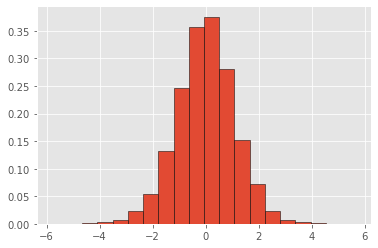

In [15]:
#generate t distribution with sample size 10000
x = t.rvs(df=12, size=10000)

#create plot of t distribution
plt.hist(x, density=True, edgecolor='black', bins=20);

<AxesSubplot:ylabel='Density'>

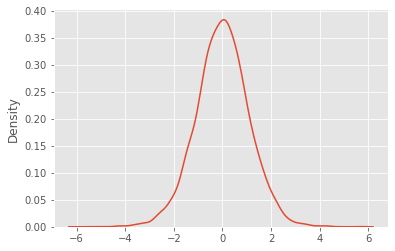

In [16]:
import seaborn as sns

#create density curve
sns.kdeplot(x)

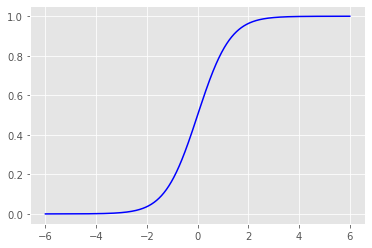

In [17]:
# t-distribution
mean=0
std=1

x=np.linspace(mean-6*std, mean+6*std,1000)

plt.plot(x,t.cdf(x,df=10),'b')


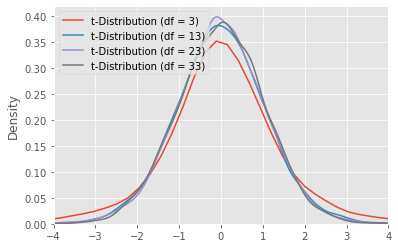

In [49]:
fig, ax = plt.subplots()
plt.xlim(-4,4)
for i in range(3,34,10):
    x = t.rvs(df=i, size=10000)
    sns.kdeplot(x, ax=ax, label=f"t-Distribution (df = {i})")
plt.legend()

Note: The degrees of freedom don't really change the curve very much unless using small numbers

As DF increases, the distribution approaches a normal distribution

After 30 DF the t-critical value and z-critical value are basically the same

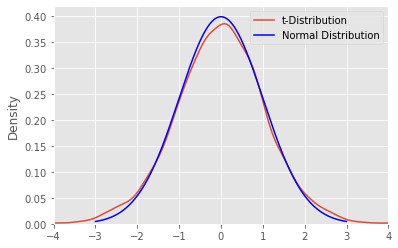

In [43]:
# Normal versus T-Distribution
fig, ax = plt.subplots()
plt.xlim(-4,4)

x = t.rvs(df=12, size=10000)
sns.kdeplot(x, ax=ax, label="t-Distribution")

x=np.linspace(mean-3*std, mean+3*std,1000)
iq=sc.norm(mean,std)
ax.plot(x,iq.pdf(x),'b', label="Normal Distribution")
plt.legend()



Shows t-dist has heavy tails (aka greater kurtosis) thus causing a smaller peak



In [38]:
# calculate the p-value of test statistic

t_value = 2.0

# one-tailed p-value
t.cdf(x=t_value, df=20)

# two-tailed p-value
#calculate p-value
(1 - t.cdf(x=t_value, df=20)) * 2

0.05926553544657054

### T-Test

In [9]:
sc.ttest_ind(rand_data, rand_data_2)

Ttest_indResult(statistic=-32.146719333382265, pvalue=3.338779476114497e-156)

T-statistic is in units of standard error
So a t-statistic of zero means there is no evidence that the two samples are different so fail to reject null hypothesis
The p-value is the area under the curve from the T-static to the right for a one-tail t-test

<table style="border: 1px solid black;">
    <tr style="border: 1px solid black;">
        <td></td>
        <td style="border: 1px solid black; text-align: center" colspan="2"> Reality </td>
    </tr>
    <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;"> Prediction </td>
        <td> True Effect </td>
        <td> No Effect </td>
    </tr>
    <tr>
        <td style="border: 1px solid black;"> Reject $H_o$ </td>
        <td> Truth </td>
        <td> Type I / Alpha Error </td>
    </tr>
    <tr>
        <td style="border: 1px solid black;"> Fail to Reject $H_o$ </td>
        <td> Type II or Beta Error </td>
        <td> Truth </td>
    </tr>
</table>

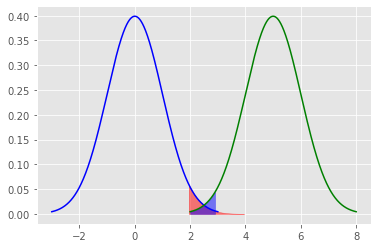

In [15]:
plt.style.use('ggplot')

# standard normal distribution
mean_ho=0
std_ho=1

x_ho=np.linspace(mean_ho-3*std_ho, mean_ho+3*std_ho,1000)
iq_ho=sc.norm(mean_ho,std_ho)
plt.plot(x_ho,iq_ho.pdf(x_ho),'b')

mean_h1=5
std_h1=1

x_h1=np.linspace(mean_h1-3*std_h1, mean_h1+3*std_h1,1000)
iq_h1=sc.norm(mean_h1,std_h1)
plt.plot(x_h1,iq_h1.pdf(x_h1),'g')

# shows two tailed 95% significance interval (aka 2 std. deviations)
# alpha = 0.025 for each tail
pr=np.arange(1.95,4,0.1)
plt.fill_between(pr,iq_ho.pdf(pr),color='r', alpha=0.5)

# pl=np.arange(-4,-1.95,0.1)
# plt.fill_between(pl,iq.pdf(pl),color='r')

pl_h1=np.arange(2,2.95,0.1)
plt.fill_between(pl_h1,iq_h1.pdf(pl_h1),color='b', alpha=0.5)

# Note 1:  a one tailed test with an alpha=0.05 would have a std. deviation of 1.64
# Note 2:  the significance interval is the area between the two tails.

plt.show()

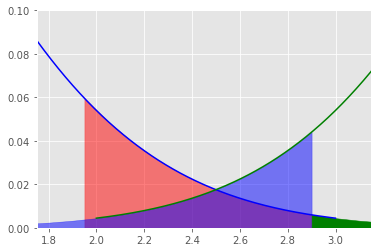

In [36]:
plt.style.use('ggplot')

# standard normal distribution
mean_ho=0
std_ho=1

x_ho=np.linspace(mean_ho-3*std_ho, mean_ho+3*std_ho,1000)
iq_ho=sc.norm(mean_ho,std_ho)
plt.plot(x_ho,iq_ho.pdf(x_ho),'b')

mean_h1=5
std_h1=1

x_h1=np.linspace(mean_h1-3*std_h1, mean_h1+3*std_h1,1000)
iq_h1=sc.norm(mean_h1,std_h1)
plt.plot(x_h1,iq_h1.pdf(x_h1),'g')

# shows two tailed 95% significance interval (aka 2 std. deviations)
# alpha = 0.025 for each tail
pr=np.arange(1.95,2.95,.1)
plt.fill_between(pr,iq_ho.pdf(pr),color='r', alpha=0.5)

# pl=np.arange(-4,-1.95,0.1)
# plt.fill_between(pl,iq.pdf(pl),color='r')

pl_h1=np.arange(1.5,2.95,0.1)
plt.fill_between(pl_h1,iq_h1.pdf(pl_h1),color='b', alpha=0.5)

pl_alpha=np.arange(2.90,3.5,0.1)
plt.fill_between(pl_alpha,iq_ho.pdf(pl_alpha),color='g', alpha=1)


# Note 1:  a one tailed test with an alpha=0.05 would have a std. deviation of 1.64
# Note 2:  the significance interval is the area between the two tails.
plt.xlim(1.75, 3.15)
plt.ylim(0, 0.1)
plt.show()

In [ ]:
# The red to the right is alpha (type I error)
# The blue to the left of the red is beta (type II error)
# Power is area to the right of the blue/purple
# The p-value is the area to the right of the test statistic
# or if the test statistic is in the alpha region then reject Ho

/https://jupyterbook.org/en/stable/content/math.html 

This is the equation for standard deviation (biased estimator):

$\sigma = \sqrt{\frac{\sum{(x_1 - \mu)}^2}{N}}$ 

$Standard Error = \frac{\sigma}{\sqrt{n}}$

distribution t-value is a function of $\alpha$ and sample size n

test statistic t-value is based on the equations below:

Equations below show the numerator as the difference between the means and the denominator as an estimate of the standard error (aka approx standard deviation)

The T-value is an estimate of how many standard deviations are between the two sample means.  The t-distribution is used to determine if this test statistic is greater than (reject null hypothesis) or less than (fail to reject null hypothesis) the threshold (the standard deviations associated with $\alpha$)


This is the equation for unequal variance t-test

$T-value = \frac{mean_1 - mean_2}{\sqrt{\Biggl( \frac{var_1}{n_1} + \frac{var_2}{n_2} \Biggr) }}$

The degree of freedoms is calculated as:

$ D of F = \frac{ \Biggl( \frac{var_1^2}{n_1} + \frac{var_2^2}{n_2} \Biggr)^2}{\frac{ \Biggl( \frac{var_1^2}{n_1} \Biggr)^2}{n_1-1} + \frac{ \Biggl(\frac{var_2^2}{n_2} \Biggr)^2}{n_2-1}}$

The equation for the paired t-test is:

$ T-value = \frac{mean_1 - mean_2}{\frac{s(diff)}{\sqrt{(n)}}} $
    
The degreees of freedom are `n-1`

Equal Variance or Pooled T-test

$T-value = \frac{mean_1 - mean_2}{ \frac{(n_1 - 1) x var_1^2+(n_2-1) x var_2^2}{n+1 + n_2 - 2} X \sqrt{\frac{1}{n_1} + \frac{1}{n_2}} }$

D of F = $n_1 + n_2 - 2$

# confidence intervals
$Confidence Interval = x \pm t_{1 - \alpha/2, n-1} \Biggl(\frac{s}{\sqrt{n}}\Biggr)$

### Choosing t table or z table

1.  t table - unknown population standard deviation
1.  t table - sample less 30 records
1.  z table - population std deviation known and 30+ records

So the basic idea is that we calculate a T-value and if the distribution of the means